In [56]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [57]:
df3=pd.read_csv("Churn_Modelling.csv")
df3

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [71]:
df4=df3.drop(["RowNumber","Surname","Age","Geography","Gender"],axis=1)
df4

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,83807.86,1,0,1,112542.58,0
2,15619304,502,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,15606229,771,5,0.00,2,1,0,96270.64,0
9996,15569892,516,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,7,0.00,1,0,1,42085.58,1
9998,15682355,772,3,75075.31,2,1,0,92888.52,1


In [72]:
x=df4.iloc[:,:-1]
y=df4.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Accuracy of Test Data
Naive Bayes Accuracy : 80.35 %


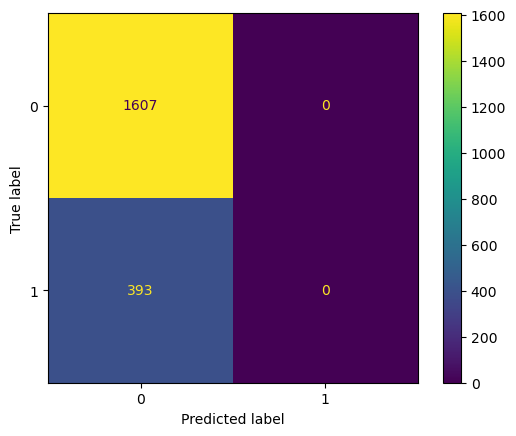

In [79]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
prediction_nb =nb.predict(X_test)

print("Accuracy of Test Data")
nb_score=accuracy_score(y_test,prediction_nb)

a3 = nb_score*100
print("Naive Bayes Accuracy :",a3,"%")

b2 = ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test, ax=axs[1])
b2.plot()
plt.show()

Accuracy 
76.7


C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

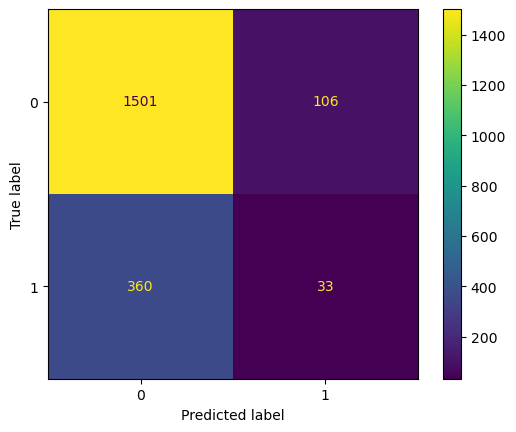

In [78]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("Accuracy ")
a2 = knn.score(X_test,y_test)*100
print(a2)

b2 = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, ax=axs[1])
b2.plot()
plt.show()

Decision Tree Accuracy: 74.0


array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

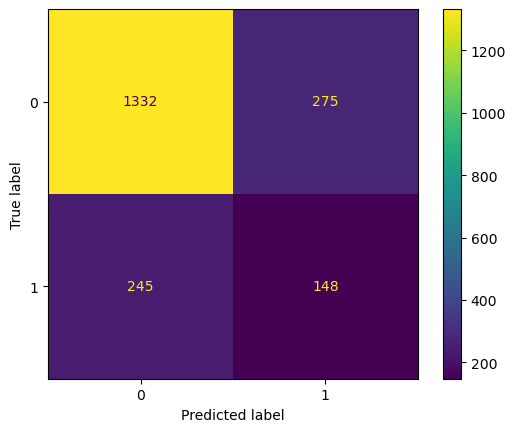

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
deci_tree = DecisionTreeClassifier(criterion="entropy")
deci_tree.fit(X_train, y_train)

# Make predictions on the testing set
predictions = deci_tree.predict(X_test)

# Calculate accuracy
accuracy_hold = accuracy_score(y_test, predictions)
a1 = accuracy_hold * 100
print("Decision Tree Accuracy:", a1)

# Plot confusion matrix

b1 = ConfusionMatrixDisplay.from_estimator(deci_tree, X_test, y_test, ax=axs[0])
b1.plot()
predictions

In [76]:
#SVM
from sklearn.svm import SVC
pr=SVC(kernel='linear',random_state=0)
pr.fit(X_train,y_train)
y_pred=pr.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print("SVM Accuracy: ",accuracy_score(y_test,y_pred)*100)

SVM Accuracy:  80.35


Random Forest Accuracy: 82.15


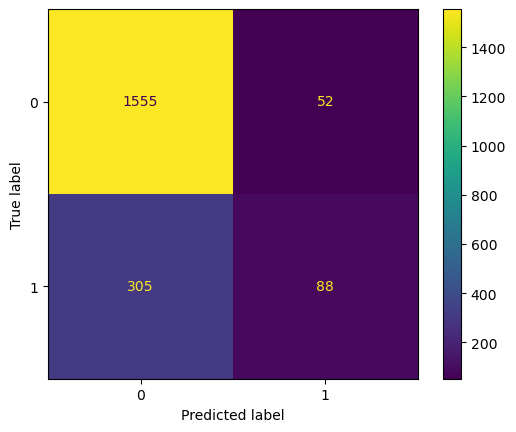

In [77]:
# Create and train the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the testing set
predictions_rf = random_forest.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, predictions_rf)
print("Random Forest Accuracy:", accuracy_rf * 100)

# Plot confusion matrix

b2 = ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test, ax=axs[1])
b2.plot()
plt.show()